In [16]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit



In [17]:
df = pd.read_csv('data_csv.csv', index_col='loan_applicant_id')
df.head()

,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
loan_applicant_id,,,,,,,,,
191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0


In [18]:
x = df['household_income'].values
y = df['y'].values
print(x,y, sep="\n")
print(type(x), type(y), sep="\n")

[192  57 212 ... 264  56 240]
[1 0 0 ... 1 0 0]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
import matplotlib.pyplot as plt

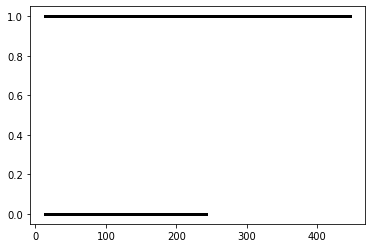

In [20]:
plt.scatter(x, y, color="black", marker = "X", s=3)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

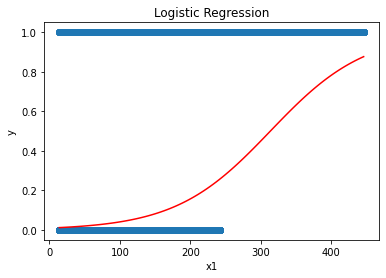

In [22]:
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)


# # Visualising the Training set results
plt.scatter(x_test, y_test)

# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red')

# show the scatter plot and line plot on the same graph
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Logistic Regression')
plt.show()

In [23]:
import seaborn as sns

<AxesSubplot:>

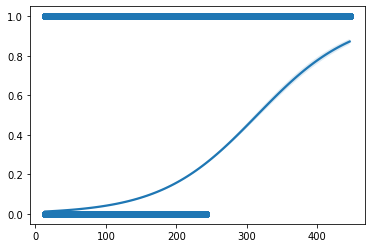

In [24]:
sns.regplot(x=x, y=y, data=df, logistic=True)

# Try do manually

In [50]:
from scipy.stats import norm
import math
def f(x,b,mu,sigma):
    # Not factoring in T since we don't know the time period
    t1 = np.log(b) - np.log(x)
    # print(t1, b, x)
    # print(t1.shape, b.shape, x.shape)
    # t1 = math.log(b) - math.log(x)
    t2 = (mu -sigma**2/2)
    t3 = (t1 - t2)/sigma
    result = norm.cdf(t3, loc=mu, scale=sigma)
    print(type(result))
    return result

In [51]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x_train, y_train.astype(float))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.